# Genome Assembly

## Question 1: Coverage Analysis
###### Question 1a. How long is the reference genome? 
samtools faidx asm/ref.fa:
233806
###### Question 1b. How many reads are provided and how long are they? 
1. 180.1: 35178 reads, length 100
2. 180.2: 35178 reads, length 100
3. 2k.1: 70355 reads, length 50
4. 2k.2: 70355 reads, length 50

###### Question 1c. How much coverage do you expect to have? 
1. 180: (35178*100)/233806 (so 15x coverage)
just kidding: its 30x coverage cause we have forward and reverse!
2. 2k: (70355*50)/233806 (so 15x coverage)
just kidding: its 30x coverage cause we have forward and reverse!

###### Question 1d. Plot the average quality value across the length of the reads
180_1.png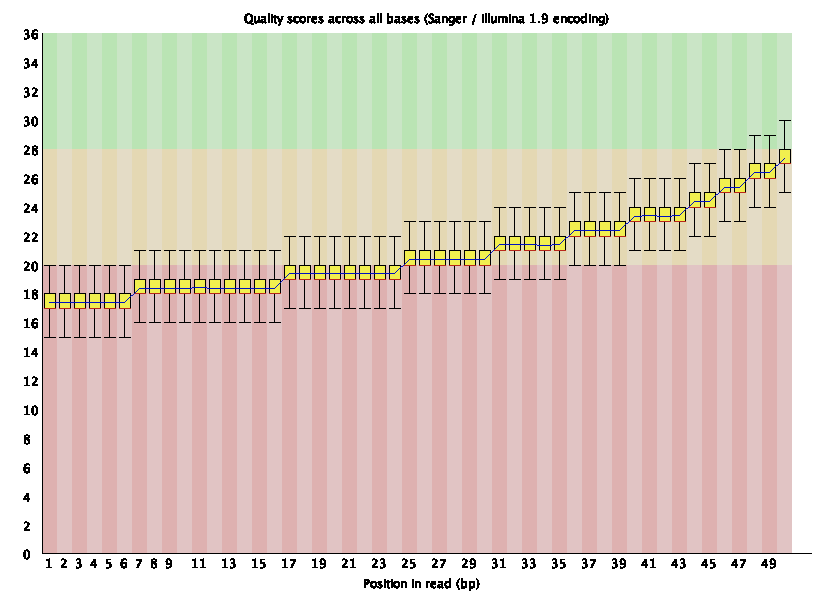
jump2k_1.png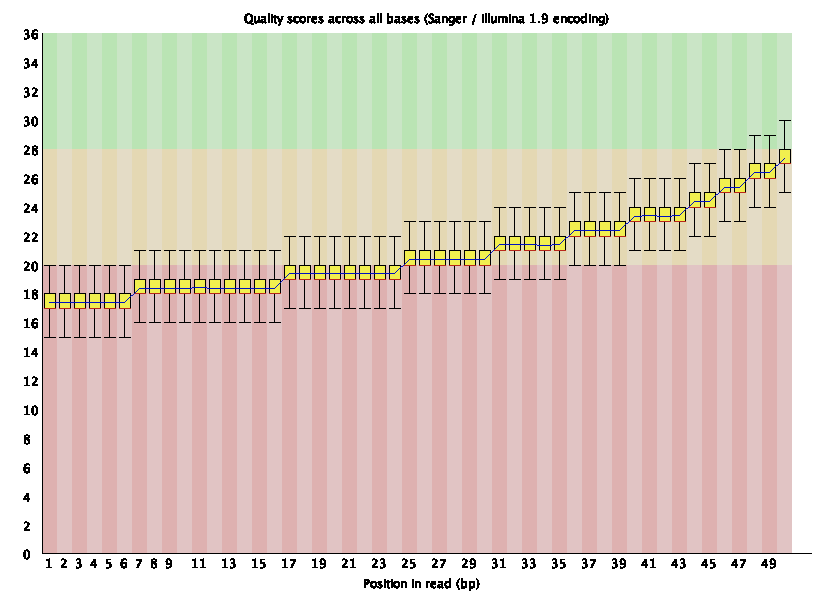


## Question 2: Kmer Analysis
###### Question 2a. How many kmers occur exactly 50 times? [Hint: try jellyfish histo]
1091
jellyfish count -m 21 -C -s 1000000 *.fq
jellyfish histo mer_counts.jf > reads.histo
less -S reads.histo
# come back and doccument this ^
###### Question 2b. What are the top 10 most frequently occurring kmers
jellyfish dump -c -t mer_counts.jf | sort -r -g -k 2 | head -n 10 
for dump: -c is for columns, -t is for tab seperated
for sort: -r is for reverse order, -g is for numeric, -k 2 is for sorting based on the second column.

GCCCACTAATTAGTGGGCGCC	105
CGCCCACTAATTAGTGGGCGC	104
CCCACTAATTAGTGGGCGCCG	104
ACGGCGCCCACTAATTAGTGG	101
CAGGCCAGCTTATAAGCTGGC	98
AACAGGCCAGCTTATAAGCTG	98
ACAGGCCAGCTTATAAGCTGG	97
AGGCCAGCTTATAAGCTGGCC	95
AGCATCGCCCACATGTGGGCG	83
GCATCGCCCACATGTGGGCGA	82
###### Question 2c. What is the estimated genome size based on the kmer frequencies? [Hint: upload the jellyfish histogram to GenomeScope and report the min “Genome Haploid Length” in the “Results” section]
went to genomescope (http://www.genomescope.org/) and uploaded my .histo file to it! then the output is exactly what I needed
233,468 bp
# review the powerpoint on the logic behind kmer frequency to the total genome size
###### Question 2d. How well does the GenomeScope genome size estimate compare to the reference genome? [Hint: In a sentence or two]
reference genome length: 233806
WOW! I am very impressed at how close it is! (only 338 bp shorter, and I would expect the minimum estimate to be below the target value)

## Question 3. De novo assembly:
spades.py --pe1-1 frag180.1.fq --pe1-2 frag180.2.fq --mp1-1 jump2k.1.fq --mp1-2 jump2k.2.fq -o asm -t 4 -k 31
# come back and figure out what this means
###### Question 3a. How many contigs were produced? [Hint: try grep -c '>' contigs.fasta]
grep -c ">" asm/contigs.fasta
4

###### Question 3b. What is the total length of the contigs? 
234467

samtools faidx contigs.fasta
less -S contigs.fasta.fai
105831+47861+41352+39423

I think we could do some function like this:

count = 0

for line in file:

assign fields using split

count = count + field[2]

print(count)

###### Question 3c. What is the size of your largest contig? 
sort -r -g -k 2

105831

###### Question 3d. What is the contig N50 size? 
47861

I think we could do some function like this:

bp_length = total_ref//2

N50_counter = 0

while N50_counter < bp_length:
    
    for line in file:
    
    assign fields using split
    
    N50_counter = N50_counter + field[2]

print(field[2])

## Question 4. Whole Genome Alignment
###### Question 4a. What is the average identify of your assembly compared to the reference?
100%
I don't think we would get this for a typical one, but I'm thinking this is just because this is an example so maybe it's pre-cleaned?

dnadiff ref.fa asm/contigs.fasta
###### Question 4b. What is the length of the longest alignment
105831
dnadiff ref.fa asm/contigs.fasta
nucmer ref.fa asm/contigs.fasta
show-coords out.delta
###### Question 4c. How many insertions and deletions are in the assembly? 
there is 1 insertion and 5 deletions

less -S out.report

In [ ]:
## Question 5. Decoding the insertion
###### Question 5a. What is the position of the insertion in your assembly? Provide the corresponding position in the reference.
######
######
######

In [ ]:
jellyfish dump -c -t mer_counts.jf | sort -r -g | head -10 > kmers.txt

In [2]:
233806-233468


338

In [3]:
105831+47861+41352+39423


234467

In [1]:
(35178*100)/233806

15.045807207685003

In [2]:
(70355*50)/233806

15.045593355174804

In [4]:
233806/2

116903.0

In [5]:
105831+47861

153692